In [46]:
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings('ignore')
# https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

# perhaps add also this comparison of NN and Tree-Methods:
# https://arxiv.org/pdf/2207.08815.pdf

# https://arxiv.org/abs/2207.08815.pdf 
# twice stumbled upon the same paper :-)

## Why trees?

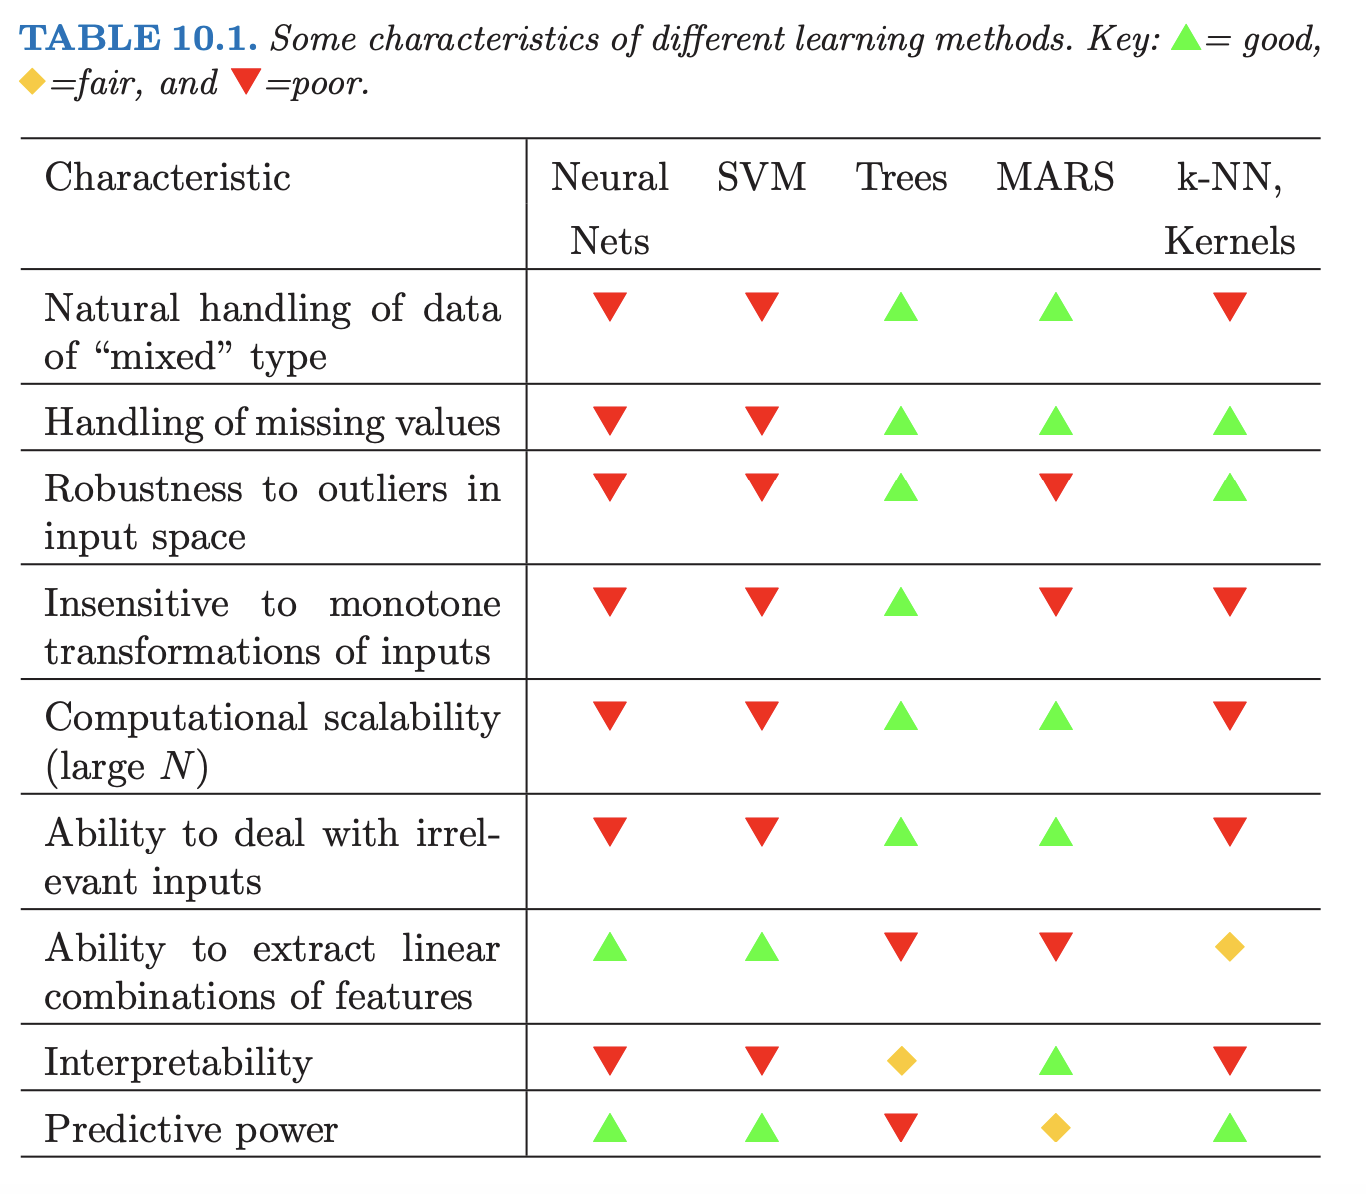

In [65]:
Image("../images/weak_learners_for_boosting.png", width="960", height="960")
# <img alt="" caption="how data leakage might happen" 
# id="data_leakage" src="../images/weak_learners_for_boosting.png" width="640" height="640">

image taken form [p.370](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)<br>

 - Trees can handle continuous variables variables as well as categorical or ordinal variables. 
 - Missing values 'NA' are just an additional level of a categorical variable.
 - No statistics like the mean or variance are computed during the tree-construction. Outliers would most naturally influence such statistics.
 - The same is true for monotone transformations. The splitting criterion is computed for splits between consecutive values no matter what the scale is. Gini and Entropy are not depending on the scale.
 - The number of possible splits and the depth of the tree affect the runtime of an decision tree. Modern Histogram techniques cope well with this. 
 - Irrelevant inputs are just not considered for splits. The do not affect the performance in a negative way.
 - Since all splits are orthogonal to each other, by definition, no linear combinations are extracted. But by repeatedly splitting on the same variables any smooth function can be approximated.
 - Interpretability is rather high as compared to pure black-boxes.
 - The predictive power of a single Tree can be enhanced by bagging multiple trees (e.g. random forest).

In nachfolgender Graphik wird demonstriert, wie ein decision-tree classifier nach und nach den Input-Variablen-Raum unterteilt um möglichst reine Unterräume zu erhalten. Diese Unterräume entsprechen den jeweiligen Knoten im Baum (nodes), bzw. den Blättern.<br>

Wichtig ist, dass diese splits auf einer Variablen immer __orthogonal__ sind. 


In nachfolgender Graphik wird demonstriert, wie ein decision-tree classifier nach und nach den Input-Variablen-Raum unterteilt um möglichst reine Unterräume zu erhalten. Diese Unterräume entsprechen den jeweiligen Knoten im Baum (nodes), bzw. den Blättern.<br>

```{sidebar} orthogonale splits
Wichtig ist, dass diese splits auf einer Variablen immer __orthogonal__ sind. 
```

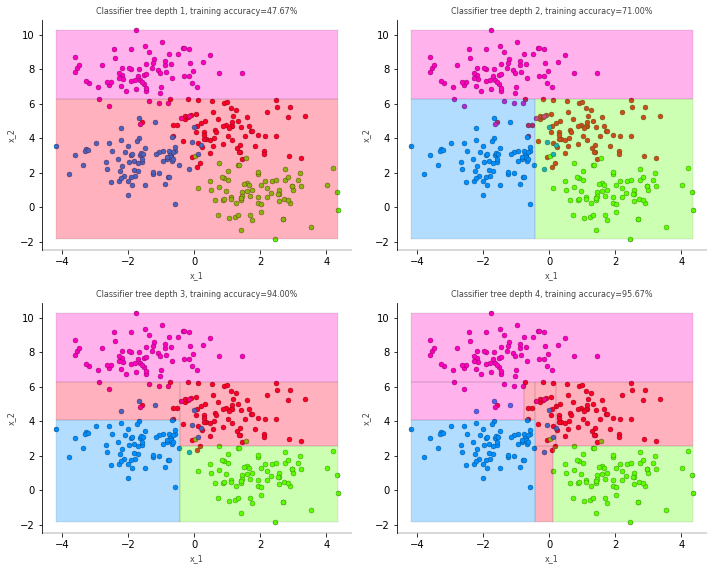

In [48]:
from sklearn.datasets import make_blobs
from sklearn import tree
from dtreeviz.trees import *
import graphviz
import pandas as pd


# little hack for adjusting the color of the regions
base = plt.cm.get_cmap('gist_rainbow')
color_list = base(np.linspace(0, 1, 4))
color_list = color_list * 255
color_list = color_list.astype('int')
new_list = ["#{0:02x}{1:02x}{2:02x}".format(
    color_list[i][0], color_list[i][1], color_list[i][2]) for i in range(len(color_list[0]))]


my_colors = [None] + [new_list[0:i+1] for i in range(len(new_list))]
from dtreeviz.colors import adjust_colors
colors = adjust_colors(None)
colors['classes'] = my_colors
colors['rect_edge'] = '#000000'
colors['edge'] = '#000000'
colors['split_line'] = '#000000'
colors['wedge'] = '#000000'
colors['scatter_edge'] = '#000000'
colors['tesselation_alpha'] = 0.3

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
X = pd.DataFrame(X)
X.columns = ['x_1', 'x_2']
y = pd.DataFrame(y)
y.columns = ['y']
class_names = np.unique(y.values)
y = y['y'].map({n:i for i, n in enumerate(class_names)})

plt.close('all')
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# for axi, depth  in zip(ax.reshape(-1,).tolist(), range(1, 5)):
#    ct = ctreeviz_bivar(axi, X , y, max_depth=depth,
#                    feature_names = ['x_1', 'x_2'],
#                    class_names=['class1', 'class2', 'class3', 'class4'],
#                    target_name='y',
#                    fontsize=8,
#                    show={'splits','title'})

for axi, depth in zip(ax.reshape(-1,).tolist(), range(1, 5)):
    dt = tree.DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)    
    ct = ctreeviz_bivar(dt, X , y,
                    feature_names = ['x_1', 'x_2'],
                    class_names=['class1', 'class2', 'class3', 'class4'],
                    target_name='y',
                    fontsize=8,
                    ax = axi,
                    show={'splits','title'})
    
plt.tight_layout(pad = 1)    
plt.show()

Dies ist der decision-trees mit den splits, wie sie oben dargestellt sind.

In [49]:
!pip install svglib reportlab

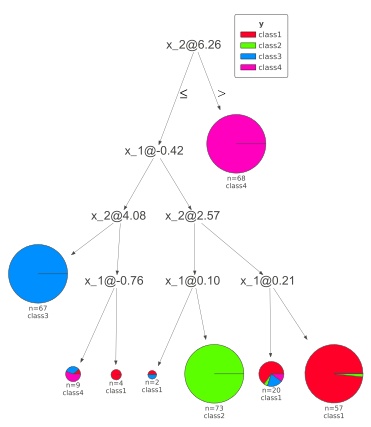

In [50]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

plt.close('all')
#fig, ax = plt.subplots(1,1, figsize=(7, 6))
clsfr = tree.DecisionTreeClassifier(max_depth = 4)
clsfr.fit(X.values, y.values)
viz = dtreeviz(clsfr, X, y, target_name='y',
                   feature_names = ['x_1', 'x_2'],
                   class_names=['class1', 'class2', 'class3', 'class4'],
                   fancy = False
                   )
viz.save('tree.svg')
drawing = svg2rlg("tree.svg")
renderPM.drawToFile(drawing, "tree.png", fmt="PNG")
Image("tree.png", width=420, height=420)

### Compare to linear Regression (logistic regression in this case)
Logistic Regression only works for binary classes. But we can always classify <b>o</b>ne class <b>v</b>ersus the <b>r</b>est (ovr) of the other classes - this allows multiclass classification with logistic regression.<br>
We can see, whereas the classification tree can approximate non-linear seperating lines with many rectangular splits, the logistic regression can only do linear splits.

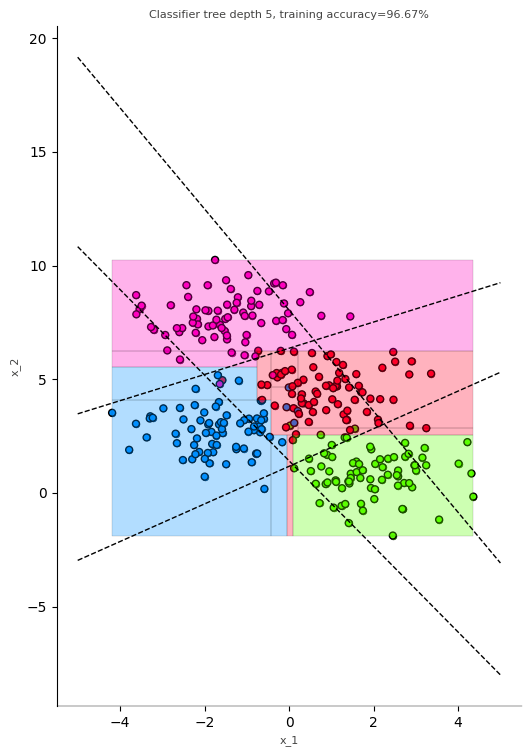

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0, fit_intercept=True)

import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 8), dpi=100)
cols = ['#ff0028', '#5bff00', '#008fff', '#ff00bf']

plt.close('all')
fig = plt.figure(figsize=(6, 9), dpi=100)
ax = fig.add_subplot(111)
# plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
# plt.subplot(121)
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
# fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# plt.scatter(X.x_1, X.x_2, marker="o", c=y.map({0:cols[0], 1:cols[1], 2:cols[2], 3:cols[3]}).tolist(), s=25, edgecolor="k")
# for i in np.unique(y):
#     y_0 = y == i
#     y_0 = y_0.astype(int)
#     model.fit(X, y_0)
#     b = model.intercept_[0]
#     w1, w2 = model.coef_.T
#     # Calculate the intercept and gradient of the decision boundary.
#     c = -b/w2
#     m = -w1/w2

    # Plot the data and the classification with the decision boundary.
#     xmin, xmax = -5, 5
#     ymin, ymax = -3, 12
#     xd = np.array([xmin, xmax])
#     yd = m*xd + c
#     plt.plot(xd, yd, 'k', lw=1, ls='--')
    
 
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)
ct = ctreeviz_bivar(dt, X , y,
                    feature_names = ['x_1', 'x_2'],
                    class_names=['class1', 'class2', 'class3', 'class4'],
                    target_name='y',
                    fontsize=8,
                    ax = ax,
                    show={'splits','title'})
ax.scatter(X.x_1, X.x_2, marker="o", c=y.map({0:cols[0], 1:cols[1], 2:cols[2], 3:cols[3]}).tolist(), s=25, edgecolor="k")
for i in np.unique(y):
    y_0 = y == i
    y_0 = y_0.astype(int)
    model.fit(X, y_0)
    b = model.intercept_[0]
    w1, w2 = model.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -5, 5
    ymin, ymax = -3, 12
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    ax.plot(xd, yd, 'k', lw=1, ls='--')


### Splitting criteria
This example is stolen form [Sebastian Raschka](https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html).<br>
For most variants of classification trees, there are basically two important splitting statistics:
  1. Gini Impurity
  2. Entropy
  
__Gini Impurity__
\begin{equation}
\text{Gini} = \sum_i^J p_i (1-p_i) = \sum_i^J p_i - p_i^2 = \sum_i^J p_i - \sum_i^J p_i^2 = 1-\sum_i^J p_i^2
\end{equation}

__Entropy Impurity__
\begin{equation}
\text{Entropy} = \sum_i^J \text{log}_2 p_i \cdot p_i
\end{equation}
With the number of classes given by $J$.

For a binary classification problem (either 0 or 1) the Gini-Index and Entropy are given by:<br>

\begin{eqnarray}
\text{Gini}\; =& \;p_0 (1-p_0) + p_1 (1-p_1) \\
\text{Entropy}\; =& \;\text{log}_2 p_0\cdot p_0 + \text{log}_2 p_1\cdot p_1
\end{eqnarray}



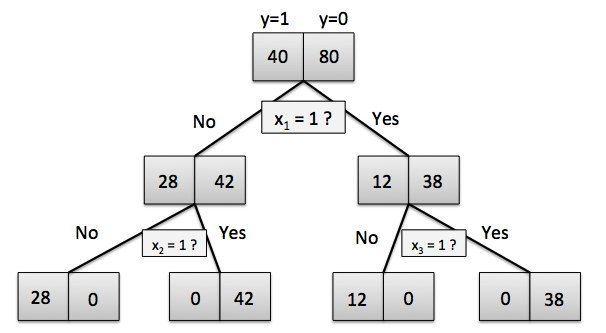

In [52]:
Image('../images/tree_splitting_criteria.png')

At the root of the tree, we have the following impurities for class 1 and class 0:<br>

\begin{eqnarray*}
p_{01} =& \frac{40}{120} = 0.3333\\
p_{00} =& \frac{80}{120} = 0.6666
\end{eqnarray*}

The Gini-Impurity at the root is given by:

\begin{align*}
\text{Gini}_{0}\; =& \;p_{01}\cdot (1-p_{01}) + p_{00}\cdot (1-p_{00}) = 0.4444 \\
\text{Entropy}_{0}\; =& \;\text{log}_2 p_{01}\cdot p_{01} + \text{log}_2 p_{00}\cdot p_{00} = 0.918
\end{align*}
<br>

Next we compute the Gini-Impurities $\text{Gini}_1$ and $\text{Gini}_2$ for the child-nodes after the first split:

\begin{eqnarray*}
p_{11} =& \frac{28}{70} = 0.4\\
p_{10} =& \frac{42}{70} = 0.6
\end{eqnarray*}

The Gini-Impurity / Entropy of the first child node is given by:

\begin{align*}
\text{Gini}_{1}\; =& \;p_{11}\cdot (1-p_{11}) + p_{10}\cdot (1-p_{10}) = 0.48 \\
\text{Entropy}_{1}\; =& \;\text{log}_2 p_{11}\cdot p_{11} + \text{log}_2 p_{10}\cdot p_{10} = 0.971
\end{align*}

For the second child node, we get:

\begin{eqnarray*}
p_{21} =& \frac{12}{50} = 0.24\\
p_{20} =& \frac{38}{50} = 0.76
\end{eqnarray*}

The Gini-Impurity / Entropy of the second child node is given by:
\begin{align*}
\text{Gini}_{2}\; =& \;p_{21}\cdot (1-p_{21}) + p_{20}\cdot (1-p_{20}) = 0.3648 \\
\text{Entropy}_{1}\; =& \;\text{log}_2 p_{21}\cdot p_{21} + \text{log}_2 p_{20}\cdot p_{20} = 0.795
\end{align*}

In the left child node, there are 70 observations, whereas in the right child node, we only have 50 observations. To compute the overall Gini-impurity after the first split, we have the weight the Gini-Impurities of the two child-nodes with the fraction of observations they represent:<br>

\begin{align*}
\text{Gini}_{\text{split1}} = \frac{70}{120} \cdot 0.48 + \frac{50}{120} \cdot 0.3658 = 0.4320 \\
\text{Entropy}_{\text{split1}} = \frac{70}{120} \cdot 0.971 + \frac{50}{120} \cdot 0.795 = 0.8980
\end{align*}<br>

We see, for Gini the impurity could be reduced by the first split from $\,\mathbf{0.4444}\,$ to $\,\mathbf{0.4320}\,$.<br>

For Entropy, the impurity could be reduced by the first split from $\,\mathbf{0.918}\,$ to $\,\mathbf{0.8980}\,$.

Instead of Gini-Impurity, we could just take __classification error__ as a criterion - this seems most intuitive:<br>
The classification error in the root node is given by:

\begin{equation}
p_0 = \frac{40}{120} = \mathbf{0.333}
\end{equation}
The classification error in the first child-node is:<br>
\begin{equation}
p_1 = \frac{28}{70} = 0.4
\end{equation}
And the classification error in the second child-node is given by: <br>
\begin{equation}
p_2 = \frac{12}{50} = 0.24
\end{equation}
Now, to compute the reduction in classifiication-error, we have again to weigh the two nodes by the number of observations the contain:<br>

Classification-error after the first split is:
\begin{equation}
\frac{70}{120} \cdot 0.4 + \frac{50}{120} \cdot 0.24 = \mathbf{0.333}
\end{equation}<br>

Hence, the split is not reducing the classification-error. But without the first split, the following splits that subsequenly lead to zero classification error would not be possible.





## Randomness
![](../images/John_Holland.png)

### Evolutionary Decision Trees:

Genetic Algorithms try to mimic the genetic recombination happening in sexual reproduction:

  - Crossing Over: random recombination between the paired chromosomes inherited from each of one's parents, generally occurring during meiosis (wiki);
  - fertilization: haploid chromosomes from a random mother and a random father form a new diploid set of chromosomes
  - mutation: randomly, some genes may change accidentally
  
  
Survival of the Fittest:

  - only a certain number of the offspring passes the evolutionary bottleneck (the best adapted ones + some randomness)
  - the survivors form the next parent generation with probability proportional to their fitness

__Applied to decision trees on can:__
  - start growing a generation of decision trees, and recombine the fittest trees
  - grow and prune decision trees with evolutionary principles

### My opinion about evolutionary algorithms:
Before the advent of modern machine-learning algorithms, most algorithms (classification-trees) where optimized in a hill-climbing fashion: __straight to the top__<br>
But as we all know, the seemingly shortest path is not necessarily the best one.<br>
The straight path may end, for example, on a steep cliff, i.e the algorithm finds a local optimum that is not identical with the global optimum.<br>
Evolutionary optimization methods are a way to explore the search space in a more random fashion - avoiding getting stuck in local optima and hopefully finding the global optimum.<br>

__BUT__: 
  - There is no garantee that these algorithms will succeed. 
  - The search can be very long-lasting.
  - for other areas like hyperparameter-optimization there are better tools, e.g. Bayesian Optimization
  
__AND__:
  - Modern Algorithms as for example Random Forest or Gradient Boosting Trees have randomness build in.

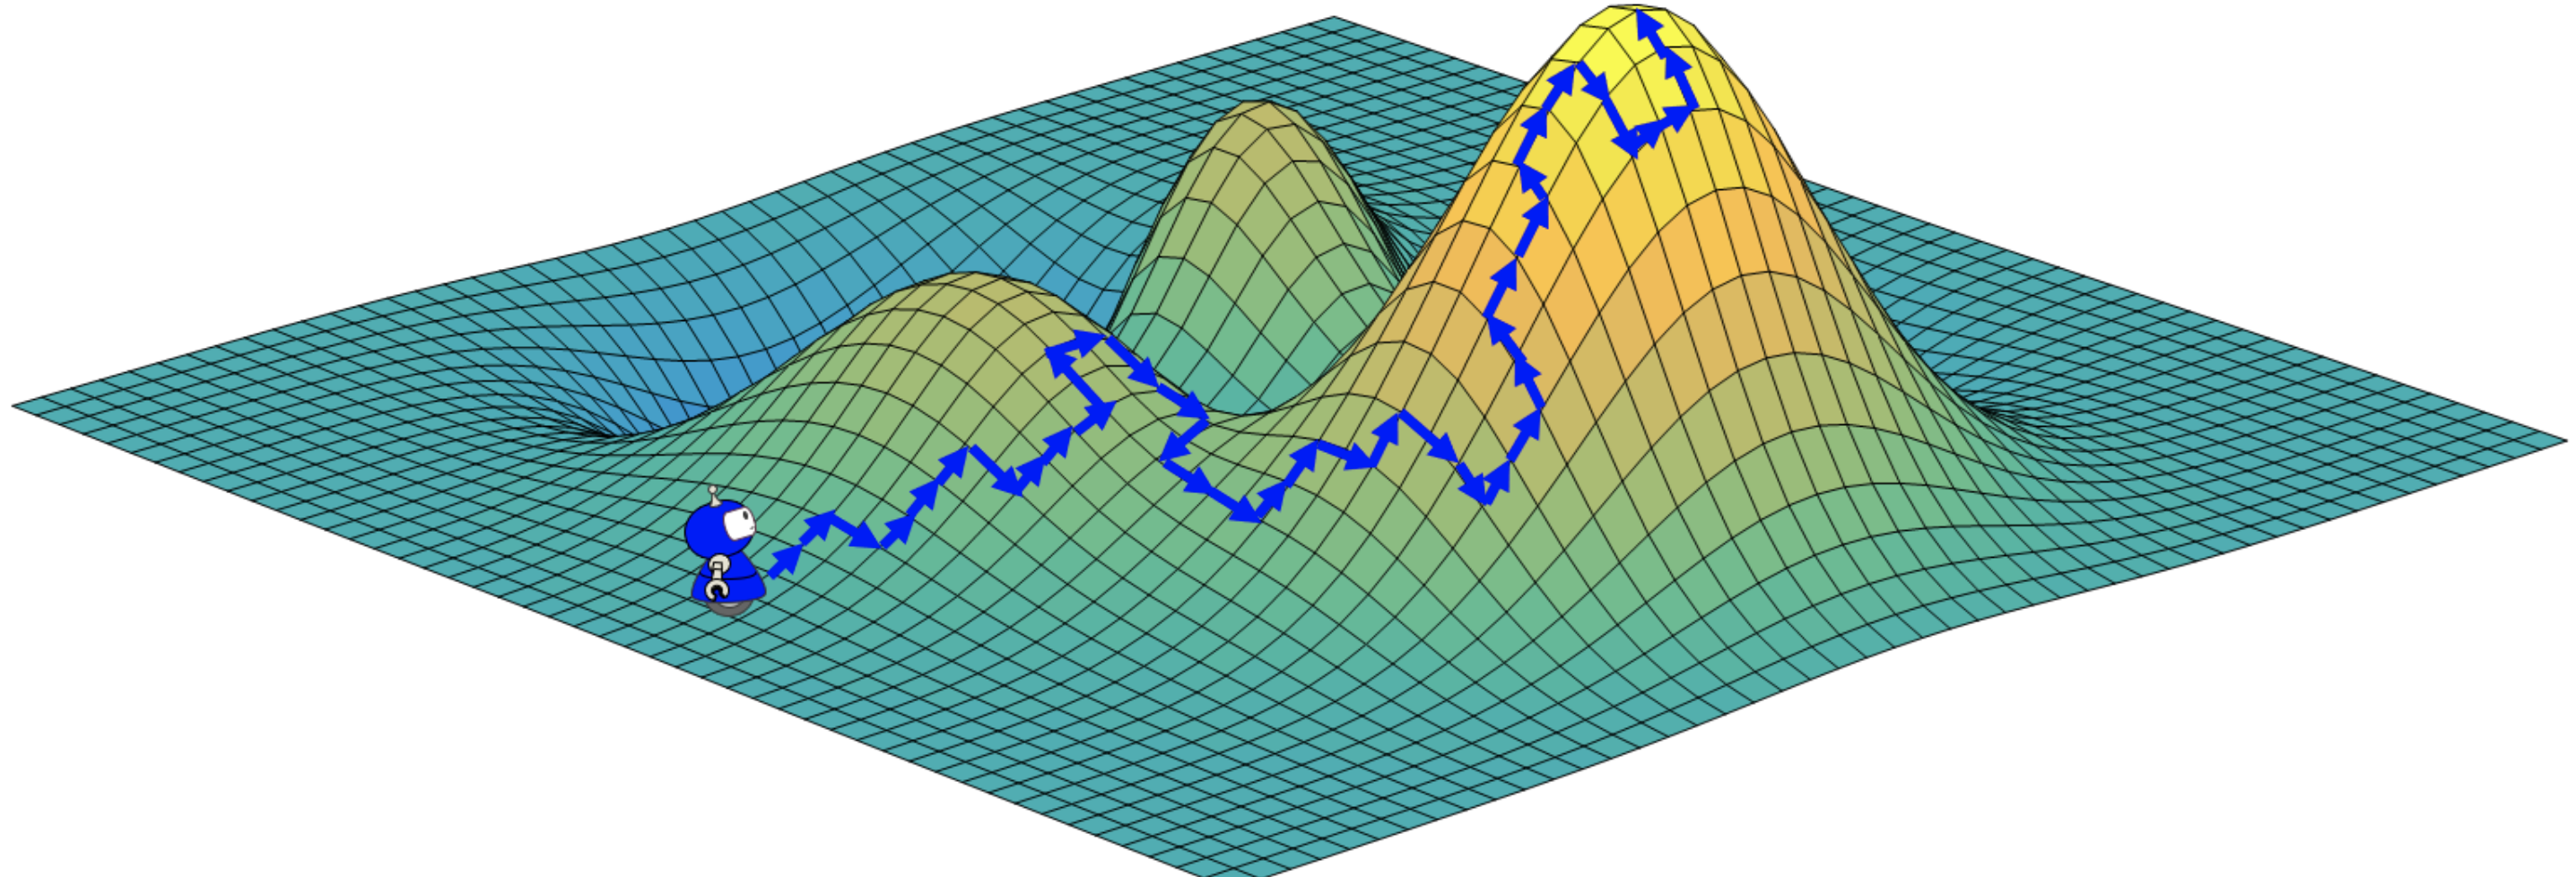

In [53]:
Image('../images/simulated_annealing2.png')

__Why randomness?__<br>

 - Randomness in the search for the best solution helps to prevent from fitting a local maximum / minimum.
 - Sometimes optimization algorithms get trapped on a plateau. Since the error surface is very flat, gradients tend to be near zero and the updates become very small. Randomness can help to get off the plateau.
 - Beneath genetic algorithms there are other strategies like simulated annealing and stochastic gradient descent.
 - Randomness helps to prevent overfitting, it can help to make the algorithm more robust.

## Random Forest
Random Forest is an example of classifier Bootstrap Aggregation or bagging.
 - trees are not very deep (only stumps)
 - each tree is build on a subsample of data and/or columns -- choosen randomly
 - results of the individual trees are aggregated (mean)

### Pros of Random Forest:

 - trees can be trained independently: easy to parallelize
 - classification and regression possible
 - all other pros of trees like: handling of missing values, insensitive to outliers, numerical and categorical data, etc..
 - can give a variance estimate (confidence intervals): mean prediction and variance of prediction (see SMAC in AutoML)
 - averaging allows for arbitrary non-linear relationships
 
### Cons of Random Forest:
 - black box algorithm: hard to interpret; (see feature importance)

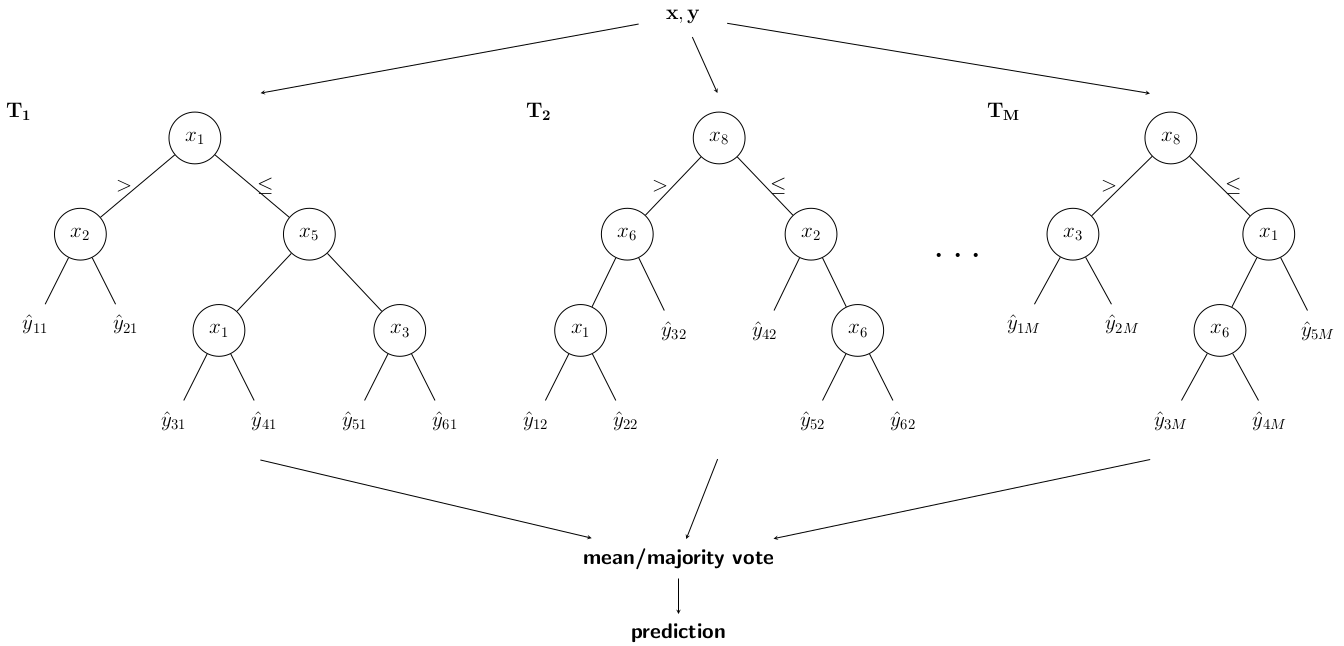

In [54]:
Image("../images/random_forest.png")
#<img alt="generated with latex" caption="Illustration of random forest" id="random_forest" #src="../images/random_forest.png">


In [68]:
######################################################################
## random forest
######################################################################
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from matplotlib.patches import Polygon
from itertools import chain
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plot_step = 0.02 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step)) 
n_estimators = 31 
  
mycmap=plt.cm.Paired
mycmap=plt.cm.Paired
colors = [mycmap(1), mycmap(3), mycmap(6), mycmap(9)]
base = plt.cm.get_cmap('gist_rainbow')
cmap = plt.cm.Reds
redc = (0.99, 0.96078431372549022, 0.94117647058823528, 0.1)

idx0 = np.where(y==0)[0]
idx1 = np.where(y==1)[0]
idx2 = np.where(y==2)[0]
idx3 = np.where(y==3)[0]


#fig, ax = plt.subplots(1)
#ax.scatter(X[:, 0], X[:, 1], c=y,  cmap=base, edgecolors = 'k')

def init():
    return []
         
clf = RandomForestClassifier(n_estimators = 0,max_depth=3, max_samples = 50, warm_start=True)

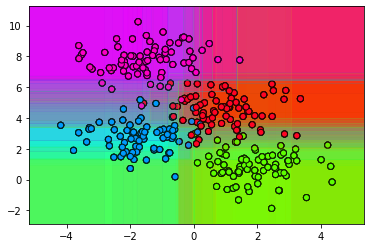

In [63]:
n_ = 30
import matplotlib.pyplot as plt
for j in range(n_):
    clf.set_params(n_estimators=int(j) + 1)
    clf.fit(X, y)    
    Z = clf.estimators_[j].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=base, edgecolors = 'k')
    
    cont = plt.contourf(xx, yy, Z, cmap = base, alpha=0.1)

Notice, how the ensemble of very small random trees can approximate continuous decision boundaries of nearly any shape.

In [69]:
def run(j):
    n_estimators = 31 
    if j > n_estimators:
        return
    clf.set_params(n_estimators=int(j) + 1)
    clf.fit(X, y)    
    Z = clf.estimators_[j].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap=base, edgecolors = 'k')
    
    cont = ax.contourf(xx, yy, Z, cmap = base, alpha=0.1)

    return [cont]

ani = animation.FuncAnimation(fig, func = run, init_func = init, frames = list(np.arange(0, n_estimators)) + [n_estimators] * 2,
                       interval = 300,  blit = False) 
HTML(ani.to_jshtml())    

# Some more theory on optimization

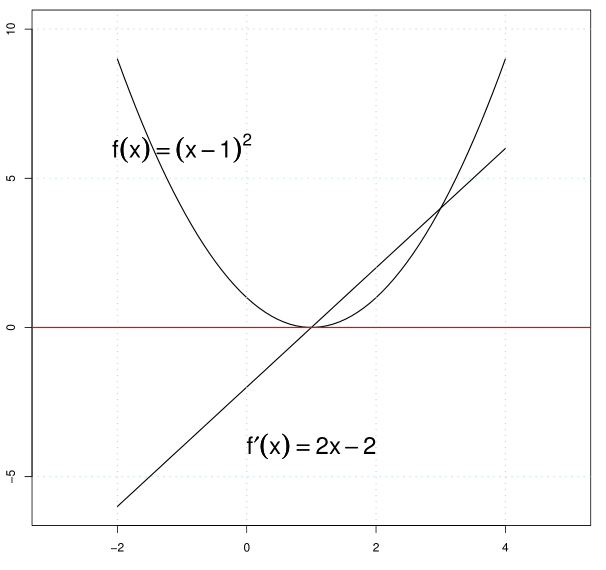

In [9]:
Image('../images/first_derivative.png', width=320, height=320)

### Newton-Raphson method

This is an iterative algorithm for finding the minimum of a function. <br>
Suppose we want to find the tangent to a point $f(x_0)$ on our quadratic-loss function. The formula for the tangent at this point is (basically it is just a linear equation - as we used in regression):<br>

\begin{equation*}
y = f'(x_0) x + f(x_0),
\end{equation*}

where $f'(x_0)$ is the first derivative - the gradient, the slope. And $f(x_0)$ is the y-value of the function at point $x_0$.<br>

Remember, for our Regression Funktion we had a linear equation with:<br>
\begin{eqnarray*}
b \quad \widehat{=}&\quad f'(x_0)\\
a \quad \widehat{=}&\quad f(x_0)\\
\end{eqnarray*}



````{sidebar} Newton-Raphson method
```{epigraph}


This is an iterative algorithm for finding the minimum of a function. <br>
Suppose we want to find the tangent to a point $f(x_0)$ on our quadratic-loss function. The formula for the tangent at this point is (basically it is just a linear equation - as we used in regression):<br>

\begin{equation*}
y = f'(x_0) x + f(x_0),
\end{equation*}

where $f'(x_0)$ is the first derivative - the gradient, the slope. And $f(x_0)$ is the y-value of the function at point $x_0$.<br>

Remember, for our Regression Funktion we had a linear equation with:<br>
\begin{eqnarray*}
b \quad \widehat{=}&\quad f'(x_0)\\
a \quad \widehat{=}&\quad f(x_0)\\
\end{eqnarray*}
```
````




Now, suppose we want to find the point where our linear equation (the tangent) intersects the x-axis. We have to find the point $x_{\text{intersect}}$, that can be expressed as a difference to the actual point: $(x_1 - x_0)$. Since the y-value at this intersection point is $0$, we can write:

\begin{eqnarray*}
f'(x_0) (x_{\text{intersect}} - x_0) + f(x_0) =& 0 \\
(x_{\text{intersect}} - x_0) =& -\frac{f(x_0)}{f'(x_0)} \\
x_{\text{intersect}} =& x_0 - \frac{f(x_0)}{f'(x_0)} \\
\end{eqnarray*}

If our loss-function is quadratic, repeating the whole procedure $n+1$ times will drive the new x-value $x_{n+1}$ ever nearer to the minimum.<br>


Next, we introduce a __learn-rate__ __$\alpha$__ that restricts the step-width in each update step:

\begin{equation*}
x_{n+1} = x_n - \alpha \frac{f(x_n)}{f'(x_n)}
\end{equation*}

````{sidebar} Newton Raphson method continued
```{epigraph}
Now, suppose we want to find the point where our linear equation (the tangent) intersects the x-axis. We have to find the point $x_{\text{intersect}}$, that can be expressed as a difference to the actual point: $(x_1 - x_0)$. Since the y-value at this intersection point is $0$, we can write:

\begin{eqnarray*}
f'(x_0) (x_{\text{intersect}} - x_0) + f(x_0) =& 0 \\
(x_{\text{intersect}} - x_0) =& -\frac{f(x_0)}{f'(x_0)} \\
x_{\text{intersect}} =& x_0 - \frac{f(x_0)}{f'(x_0)} \\
\end{eqnarray*}

If our loss-function is quadratic, repeating the whole procedure $n+1$ times will drive the new x-value $x_{n+1}$ ever nearer to the minimum.<br>


Next, we introduce a __learn-rate__ __$\alpha$__ that restricts the step-width in each update step:

\begin{equation*}
x_{n+1} = x_n - \alpha \frac{f(x_n)}{f'(x_n)}
\end{equation*}

```
````


Text(-5, 50, "$x_1 = x_0 - \\frac{f(x_0)}{f'(x_0)}$")

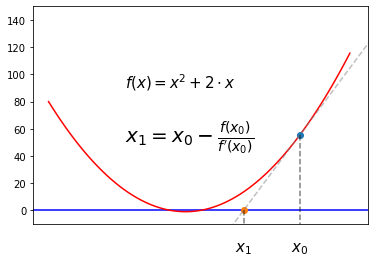

In [10]:
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

x = np.arange(-10, 10, 0.2)
y = f(x)
w = [6.5]
fig, axes= plt.subplots()
#fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='', 
          fontdict={'fontsize':15})
#axes = fig.add_subplots()
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.set_xticks([])
axes.axhline(y = 0.0, color = 'b', linestyle = '-')
axes.plot(x, y, 'r')

# arbitrary point on error-curve
axes.plot(w[0], f(w[0]),'o')
# where tangent intercepts x-axis at y=0
axes.plot(w[0]-(f(w[0])/f_(w[0])), 0, 'o')
# tangent
# y = slope * x + a
# a = y - (slope * x)
a = f(w[0]) - (f_(w[0]* w[0]))
#axes.plot([1, 10], [f_(w[0])*1 + a, f_(w[0])*10 + a], color='grey', linestyle= '--', alpha=0.5)
axes.plot([w[0]-5.5, w[0]+6.5], [f(w[0])-5.5 * f_(w[0]), f(w[0])+6.5 * f_(w[0])], color='grey', linestyle= '--', alpha=0.5)
#axes.plot([1, 10], [f(w[0]) - 3 * f_(w[0]), f(w[0]) + 3 * f_(w[0])], color='grey', linestyle= '--', alpha=0.5)
axes.plot([w[0]-(f(w[0])/f_(w[0]))]*2, [0, -10], color='black', linestyle='--', alpha=0.5)
axes.plot([w[0]]*2, [f(w[0]), -10], color='black', linestyle='--', alpha=0.5)
axes.text(w[0]-(f(w[0])/f_(w[0])), -30, r"$x_1$", horizontalalignment ='center', fontsize = 15)
axes.text(w[0], -30, r"$x_0$", horizontalalignment ='center', fontsize = 15)
axes.text(-5, 90, r"$f(x) = x^2 + 2\cdot x$", horizontalalignment ='left', fontsize = 15)
axes.text(-5, 50, r"$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$", horizontalalignment ='left', fontsize = 20)

````{sidebar} Stochastic Gradient Descent
```{epigraph}

This is very similar to __gradient descent__. Pure __gradient descent__ is only using the slope, i.e. the first derivative to decide in which direction to push the parameters.<br> 
It is called __stochastic gradient descent (SGD)__ when the $(x_i, y_i)$ pairs used to compute the loss are a subsample of the whole data-set.<br>

\begin{equation*}
x_{n+1} = x_n -\alpha \frac{1}{m}\sum_i^m f_i'(x_n)
\end{equation*}
where $m$ is the size of the sample, $f_i'$ the individual contribution of one observation to the derivative of the error. Since the parameter-update depends on the sample drawn, the updates are somewhat erratic. This is why the procedure is called __stochastic gradient descent (SGD)__. It is still the most relevant optimization algorithm for neural networks.
```
````

````{important}
```{note}
Again, we have a bit of randomness here, to prevent from hill-climbing. SGD exlpores a larger part of the solution space. In neural-network training, the learning-parameter is often continously diminished after starting with a large value. In this way the solution space is first explored by large jumps in different directions down the slope. After a good region in the solution space is found in this way, smaller learning parameters drive the parameter-vector down to the (global) minimum 
```
````

### Stochastic Gradient Descent

This is very similar to __gradient descent__. Pure __gradient descent__ is only using the slope, i.e. the first derivative to decide in which direction to push the parameters.<br> 
It is called __stochastic gradient descent (SGD)__ when the $(x_i, y_i)$ pairs used to compute the loss are a subsample of the whole data-set.<br>

\begin{equation*}
x_{n+1} = x_n -\alpha \frac{1}{m}\sum_i^m f_i'(x_n)
\end{equation*}
where $m$ is the size of the sample, $f_i'$ the individual contribution of one observation to the derivative of the error. Since the parameter-update depends on the sample drawn, the updates are somewhat erratic. This is why the procedure is called __stochastic gradient descent (SGD)__. It is still the most relevant optimization algorithm for neural networks.<br>

__note__:<br>
Again, we have a bit of randomness here, to prevent from hill-climbing. SGD exlpores a larger part of the solution space. In neural-network training, the learning-parameter is often continously diminished after starting with a large value. In this way the solution space is first explored by large jumps in different directions down the slope. After a good region in the solution space is found in this way, smaller learning parameters drive the parameter-vector down to the (global) minimum.




### Stochastic Gradient Descent with small learning rate 
$\alpha=0.15$

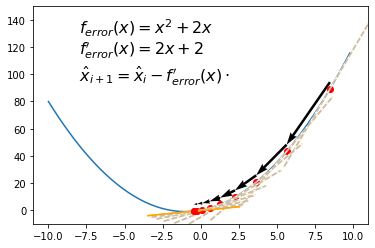

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(-10, 10, 0.2)
y = x**2 + 2*x

fig, axes= plt.subplots()
#axes=fig.add_subplot(111)
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.plot(x,y)
axes.annotate(xy=(-8, 130), s = '$f_{error}(x) = x^2 + 2x$', fontsize=16)
axes.annotate(xy=(-8, 115), s = '$f_{error}\'(x) = 2x + 2$', fontsize=16)
axes.annotate(xy=(-8, 95), s = '$\hat{x}_{i+1} = \hat{x}_i - f_{error}\'(x) \cdot \alpha$', fontsize=16)

# function and derivative
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

w = [8.5]

def init():
    return []

alpha = 0.15 #0.7
iter = 1

def run(j):   
    

    if j > 1:
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='white',
              linestyle = '-')
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='grey',
              linestyle = '--', alpha = 0.5 )
    axes.plot([w[-1]-3, w[-1]+3], [f(w[-1]) - 3*f_(w[-1]), f(w[-1]) + 3*f_(w[-1])], color='orange',
              linestyle = '-')

        
    axes.plot(w[-1], f(w[-1]), 'ro')
    new_w = w[-1] - alpha * f_(w[-1])

    if abs(new_w -w[-1]) < 0.2:
        return
    w.append(new_w)
    axes.quiver(w[-2], f(w[-2])+ 5, -alpha * f_(w[-2]), f(w[-1])- f(w[-2]),
               scale_units='xy', angles='xy', scale=1)
    return axes

ani = animation.FuncAnimation(fig, func = run, init_func = init,
                              frames = (i+1 for i in range(10)),
                       interval = 1000,  blit = False) 
HTML(ani.to_jshtml())


### Stochastic Gradient Descent with large learning rate 
$\alpha=0.75$

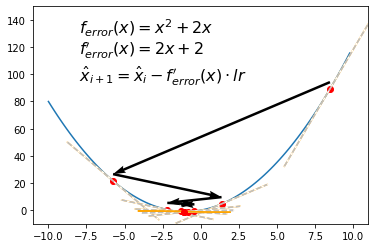

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(-10, 10, 0.2)
y = x**2 + 2*x

fig, axes= plt.subplots()
#axes=fig.add_subplot(111)
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.plot(x,y)
axes.annotate(xy=(-8, 130), s = '$f_{error}(x) = x^2 + 2x$', fontsize=16)
axes.annotate(xy=(-8, 115), s = '$f_{error}\'(x) = 2x + 2$', fontsize=16)
axes.annotate(xy=(-8, 95), s = '$\hat{x}_{i+1} = \hat{x}_i - f_{error}\'(x) \cdot lr$', fontsize=16)

# function and derivative
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

w = [8.5]

def init():
    return []

alpha = 0.75
iter = 1

def run(j):   
    

    if j > 1:
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='white',
              linestyle = '-')
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='grey',
              linestyle = '--', alpha = 0.5 )
    axes.plot([w[-1]-3, w[-1]+3], [f(w[-1]) - 3*f_(w[-1]), f(w[-1]) + 3*f_(w[-1])], color='orange',
              linestyle = '-')

        
    axes.plot(w[-1], f(w[-1]), 'ro')
    new_w = w[-1] - alpha * f_(w[-1])

    if abs(new_w -w[-1]) < 0.2:
        return
    w.append(new_w)
    axes.quiver(w[-2], f(w[-2])+ 5, -alpha * f_(w[-2]), f(w[-1])- f(w[-2]),
               scale_units='xy', angles='xy', scale=1)
    return axes

ani = animation.FuncAnimation(fig, func = run, init_func = init,
                              frames = (i+1 for i in range(10)),
                       interval = 1000,  blit = False) 
HTML(ani.to_jshtml())


The literatur treating the mathematical aspects around gradient boosting is still patchy and not very approachable. For a formal derivation (or justification) of the method, we need the concepts of __likelihood__ and __Taylor-Series__.<br>

## 2nd order Newton method


### Likelihood

One method to judge about the goodness of an estimator at hand, is to ask: how likely is the observed data, given the estimate? Or, how likely is the data to have been generated by our estimates?<br>

For example the standard normal distribution
\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2 \sigma^2}(x - \hat{\mu})^2\right) 
\end{eqnarray*}<br>
Here, $\hat{\mu} = \bar{x} = \frac{1}{n}\sum_{i=0}^n x_i$ is our average value. In the equation above, the larger the difference between $x - \hat{\mu}$ the less likely our data can be described by a normal distribution with mean-parameter $\hat{\mu}$ (for negative values $\exp$ has values far below $1.0$; if the difference is exaclty $0$ then $\exp$ has the value $1.0$)


We estimate $\mu$ and sum the probability densities over our sample; it is common to take the logarithm of the likelihood - we speak of log-likelihood: <br>

\begin{equation*}
\ell(\mu, \sigma^2, \mathbf{x}) = -\frac{n}{2}\log (2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i - \hat{\mu})^2
\end{equation*}

The first two parts of the likelihood do not depend on $\mu$, so we can savely ignore them - they are constants.<br>

__working in logarithmic scale__:<br>

When working with probabilities, it's often easier to work in a logarithmic scale; 
  - multiplying small probabilities / very large numbers might lead to very low/large numbers, that could underflow/overflow

```{sidebar} working in logarithmic scale
When working with probabilities, it's often easier to work in a logarithmic scale; 
  - multiplying small probabilities / very large numbers might lead to very low/large numbers, that could underflow/overflow
```

In [64]:
x = np.array([3, 6, 8])
print(f'with the log-sum trick results stay very prcise: {np.exp(np.sum(np.log(x)))}')
print(f'when doing real multiplications results can overflow: {np.prod(x)}')

# But results change when we operate with way larger numbers:
x = np.array([536870910, 536870910, 536870910, 536870910])
print(f'with the log-sum trick results stay very prcise: {np.exp(np.sum(np.log(x)))}')
print(f'when doing real multiplications results do overflow: {np.prod(x)}')


with the log-sum trick results stay very prcise: 143.9999999999999
when doing real multiplications results can overflow: 144
with the log-sum trick results stay very prcise: 8.307674849861747e+34
when doing real multiplications results do overflow: 6917529010461212688


\begin{equation*}
\ell(\hat{\mu}, \hat{\sigma}^2, \pmb{x}) = -\frac{1}{2\hat{\sigma}^2}\sum_{i=1}^n(x_i - \hat{\mu})^2
\end{equation*}
This Likelihood has to be maximised, i.e. we have to estimate the parameters $\hat{\sigma}^2$ and $\hat{\mu}$ in a way that they are more likely to be the parameters that have generated our data-sample.

__Maximising / Minimising__:<br>

Instead of maximising the log-likelihood we could als minimize the negative log-likelihood: this fits better in the gradient descent framework



\begin{equation*}
\ell(\hat{\mu}, \hat{\sigma}^2, \pmb{x}) = -\frac{1}{2\hat{\sigma}^2}\sum_{i=1}^n(x_i - \hat{\mu})^2
\end{equation*}
This Likelihood has to be maximised, i.e. we have to estimate the parameters $\hat{\sigma}^2$ and $\hat{\mu}$ in a way that they are more likely to be the parameters that have generated our data-sample.

```{sidebar} Maximising / Minimising
Instead of maximising the log-likelihood we could als minimize the negative log-likelihood: this fits better in the gradient descent framework
````


### Taylor-Series
For more information see the [wikipedia article](https://en.wikipedia.org/wiki/Taylor_series): "In mathematics, the Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. For most common functions, the function and the sum of its Taylor series are equal near this point."<br>
The Taylor-Series for our function $f(x)$ at the point $x_0$ is given by:

\begin{equation*}
f(x) \approx f(x_0) + \frac{f'(x_0)}{1!}(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots
\end{equation*}

The terms $\frac{1}{1!}$, $\frac{1}{2!}$, $\ldots$ are sometimes skipped, because they are constants. Also, most often the Series is expanded to only 2nd order - subsequent terms are not contributing so much to the approximation. <br>


### Taylor-Series example
The function $f(x) = e^x$ is a somewhat special function because the derivative of this function is the function itself, i.e. $f'(x) = e^x$; at the point $x=0$ the function has the value $1$: $e^0=1$. For calculations this is very convenient, because we can approximate the function by a Taylor-Series around $x=0$:
\begin{eqnarray*}
f'(0) =& e^0 = 1\\
f''(0) = & e^0 = 1\\
\vdots &
\end{eqnarray*}
Hence, the Taylor-Series expansion around $x=0$ is given by:
\begin{eqnarray*}
e^x \approx& e^0 + \frac{1}{1!}e^0(x - 0) + \frac{1}{2!}e^0(x-0)^2 + \frac{1}{3!}e^0(x-0)^3\ldots \\
e^x \approx& 1 + 1x + \frac{1}{2}x^2 +\frac{1}{6}x^3 \ldots
\end{eqnarray*}

Text(2, 5, '$e^x$')

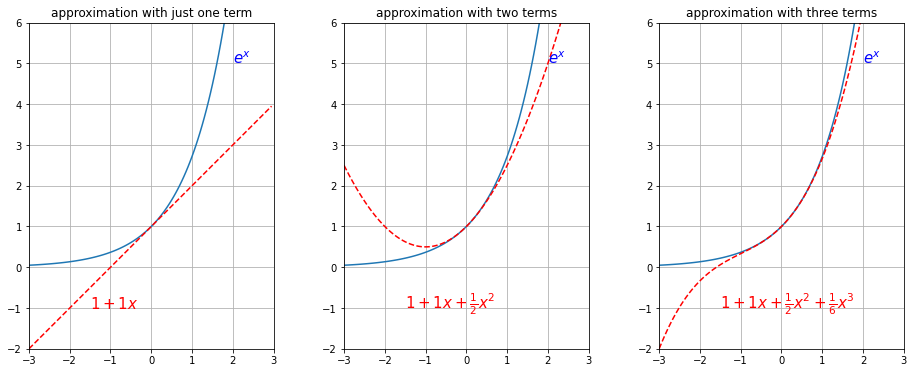

In [42]:
#f = plt.figure(figsize=(4, 4))
fig = plt.figure(figsize = (16, 6))
plt.title(label='Taylor Series for e^x', fontdict={'fontsize':20})
ax1 = plt.subplot(131, aspect='equal')
plt.xlim(-3, 3)
plt.ylim(-2, 6)
ax1.grid()
ax1.set_title('approximation with just one term')
x = np.arange(-3, 3, 0.05).reshape((-1, 1))
y = np.exp(x)
ax1.plot(x, y)
approx1 = 1 + x
ax1.plot(x, approx1, 'r--')
ax1.annotate(text=r'$1 + 1x$',xy=(-1.5, -1), color='red', size=15)
ax1.annotate(text=r'$e^x$',xy=(2, 5), color='blue', size=15)

ax2 = plt.subplot(132, aspect='equal')
plt.xlim(-3, 3)
plt.ylim(-2, 6)
ax2.grid()
ax2.set_title('approximation with two terms')
x = np.arange(-3, 3, 0.05).reshape((-1, 1))
y = np.exp(x)
ax2.plot(x, y)
approx2 = 1 + x + 0.5*x**2
ax2.plot(x, approx2, 'r--')
ax2.annotate(text=r'$1 + 1x +\frac{1}{2} x^2$',xy=(-1.5, -1), color='red', size=15)
ax2.annotate(text=r'$e^x$',xy=(2, 5), color='blue', size=15)


ax3 = plt.subplot(133, aspect='equal')
plt.xlim(-3, 3)
plt.ylim(-2, 6)
plt.grid()
ax3.set_title('approximation with three terms')
ax3.plot(x, y)
approx3 = 1 + x + 0.5*x**2 + (1/6)*x**3
ax3.plot(x, approx3, 'r--')
ax3.annotate(text=r'$1 + 1x +\frac{1}{2} x^2 +\frac{1}{6} x^3$',xy=(-1.5, -1), color='red', size=15)
ax3.annotate(text=r'$e^x$',xy=(2, 5), color='blue', size=15)

As can be seen, the approximation is very good in the vicinity of our $x_0=0$. 

### Newton's method
Here, we have a current estimate $x_0$ and the real value $x$ that we want to find in our iterative optimization process.<br>
Remember, we approximate our error function or the liklihood with the Taylor-Series expansion around an already known $x_0$:
\begin{equation*}
f(x) \approx f(x_0) + \frac{f'(x_0)}{1!}(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots
\end{equation*}

Now, suppose the function $f(x)$ is our error that we want to minimize or the negative log-likelihood we want to minimize. Then, we are interested in the step-length $(x - x_0)$ that we have to take in the direction of the minimum of our function. This is the exact same procedure as before, we have to compute the first derivative of the __approximate__ function with respect to $(x - x_0)$, set it to zero and solve for $(x - x_0)$. 

\begin{eqnarray*}
\frac{\delta f(x)}{\delta (x - x_0)} =& f'(x_0) + 2 \frac{f''(x_0)}{2!}(x - x_0)\\
\text{we set the result to }0\text{ and solve for }(x - x_0)&\\ 
f'(x_0) + f''(x_0)(x - x_0) =& 0\\
(x - x_0) =& -\frac{f'(x_0)}{f''(x_0)}\\
x = & x_0 - \frac{f'(x_0)}{f''(x_0)}\\
\end{eqnarray*}

```{sidebar} Newton's method
Here, we have a current estimate $x_0$ and the real value $x$ that we want to find in our iterative optimization process.<br>

Remember, we approximate our error function or the liklihood with the Taylor-Series expansion around an already known $x_0$:
\begin{equation*}
f(x) \approx f(x_0) + \frac{f'(x_0)}{1!}(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots
\end{equation*}

Now, suppose the function $f(x)$ is our error that we want to minimize or the negative log-likelihood we want to minimize. Then, we are interested in the step-length $(x - x_0)$ that we have to take in the direction of the minimum of our function. This is the exact same procedure as before, we have to compute the first derivative of the __approximate__ function with respect to $(x - x_0)$, set it to zero and solve for $(x - x_0)$. 

\begin{eqnarray*}
\frac{\delta f(x)}{\delta (x - x_0)} =& f'(x_0) + 2 \frac{f''(x_0)}{2!}(x - x_0)\\
\text{we set the result to }0\text{ and solve for }(x - x_0)&\\ 
f'(x_0) + f''(x_0)(x - x_0) =& 0\\
(x - x_0) =& -\frac{f'(x_0)}{f''(x_0)}\\
x = & x_0 - \frac{f'(x_0)}{f''(x_0)}\\
\end{eqnarray*}

Again, as with the tangent-method, we introduce a __learning-rate-parameter $\alpha$__ that determines the step-width:

\begin{equation*}
x_{n+1} = x_n - \alpha \frac{f'(x_n)}{f''(x_n)}
\end{equation*}

This parameter is needed, because our Taylor-Series approximation is not perfect but only good in the vicinity of the already evaluated $x_0$. In this way, the algorithm iteratively moves $x$ towards the minimum.<br> 
In short: find minimum of second-order Taylor approximation of loss function.

This algorithm usually converges in fewer steps than the tangent-method, because it includes information about the curvature (2nd derivative) of our loss-function. This is why methods containing these terms are also called __2nd order methods__.<br>

```

```{sidebar} multivariate case
When we have more variables than just $x_1$, the first derivative becomes a matrix as well as the second derivative. The inverse of the later is called the __hessian matrix__ $H$. Computationally, this is challenging because we have to compute the inverse of a matrix. Therefore, there exist methods that approximate the inverse of the matrix of second derivatives. The most reknown of these methods is called [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) (Broyden–Fletcher–Goldfarb–Shanno). 
````



Again, as with the tangent-method, we introduce a __learning-rate-parameter $\alpha$__ that determines the step-width:

\begin{equation*}
x_{n+1} = x_n - \alpha \frac{f'(x_n)}{f''(x_n)}
\end{equation*}

This parameter is needed, because our Taylor-Series approximation is not perfect but only good in the vicinity of the already evaluated $x_0$. In this way, the algorithm iteratively moves $x$ towards the minimum.<br> 
In short: find minimum of second-order Taylor approximation of loss function.

This algorithm usually converges in fewer steps than the tangent-method, because it includes information about the curvature (2nd derivative) of our loss-function. This is why methods containing these terms are also called __2nd order methods__.<br>

### multivariate case
When we have more variables than just $x_1$, the first derivative becomes a vector ($G$), the second derivative a matrix. The inverse of the later is called the __hessian matrix__ $H$. Computationally, this is challenging because we have to compute the inverse of a matrix. Therefore, there exist methods that approximate the inverse of the matrix of second derivatives. The most reknown of these methods is called [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) (Broyden–Fletcher–Goldfarb–Shanno). 

# Gradient Boosted Trees
https://twitter.com/svpino/status/1639235709725970433


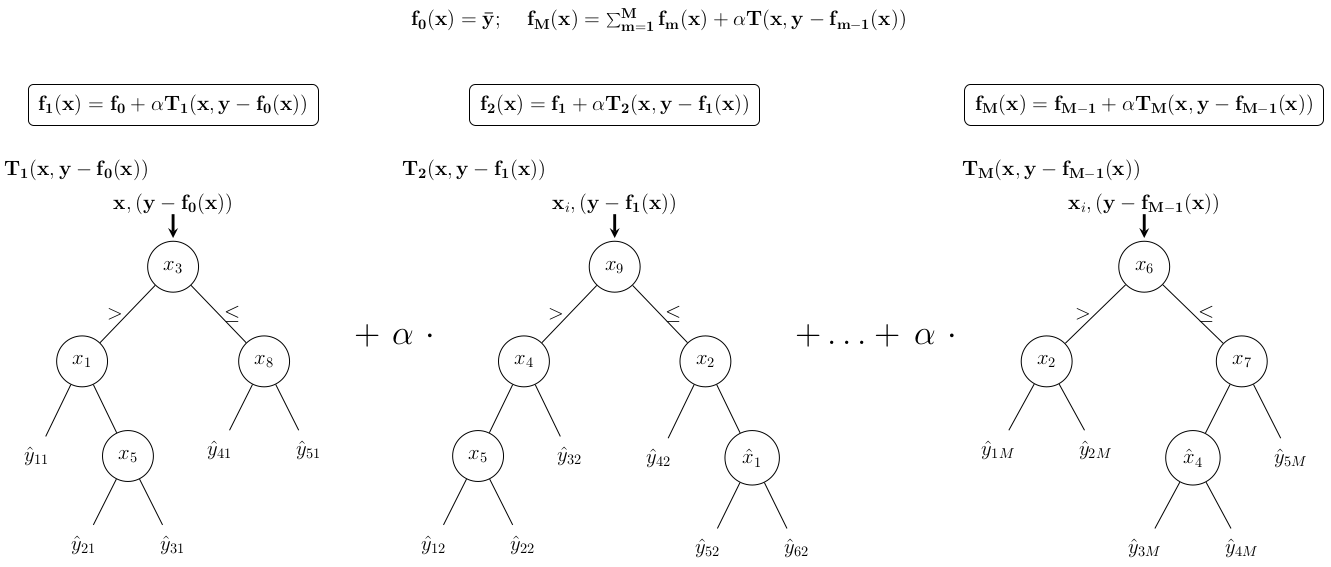

In [14]:
Image("../images/gbm.png", width=820, height=820)
#<img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" #src="../images/gbm.png">

### Explanation of Gradient Boosted Trees:
__the case of regression__<br>
  - we start with a prediction $f_0(x)$, i.e. the mean of $y$ ($\bar{y}$) for regression or the most frequent class in case of classification
  - the difference between the actual values $y_i$ and our initial start value $f_0(x)$ (residuals) is to be predicted by the first tree $T_1$; the tree uses the variables $\pmb{X}$ to find a rule to group similar residuals in common nodes. 
  - the new prediction of the tree $T_1$ is added to our initial start value and weighted by the learning parameter; now we get our prediction at iteration $1$: $f_1(x) = f_0 + \alpha T_1(\pmb{x}, y - f_0(x))$, i.e. we train a tree $T_1$ to correctly classify the residuals $y - f_0(x)$ with a rule induced on $\pmb{x}$ -- our variables. The result of this tree is weighted with leraning-rate $\alpha$ and added to the current estimate $f_0(x)$.
  - this procedure is repeated until we can not find any more trees that substantially reduce our error or until the maximum number of iterations is reached
  
Since there are many different loss-functions possible for Gradient Boosting Trees (not only regression), we are looking for a more general formula that defines the best update to our current prediction made by the next tree.

Please notice the similarity to our example of maximising the likelihood. Here, we also have a __learning rate__ $\alpha$ and in each step (each new tree added) we try to push our prediction more in the direction of the optimum. Before, we made steps on $x$ in the direction of the optimum, now each new tree added is a step.<br>
The question is: what is the best update we add with the next tree? (in our Newton-Algorithm $-\frac{f'(x_0)}{f''(x_0)}$ was the optimal update at each iteration.)

### Derivation of the optimal update formula for trees:
We try to make sense of the formulae explained [here](https://drive.google.com/file/d/0B0c0MbnP6Nn-eUNRRkVOOGpkbFk/view?resourcekey=0-nVw3WhovKW5FPvPM5GPHfg), starting at page 3:

\begin{equation*}
\mathcal{L} = \sum_{i=1}^n \ell(y_i, \hat{y}_i)
\end{equation*}

The first important thing to note here: The way, the likelihood-function is composed here is different from the usual approach. Usually, we are estimating distribution parameters as $\mu$ or $\sigma^2$ and compute the Likelihood of the observed data given our estimates.<br>
Now, every $\hat{y}_i$ of a leaf is treated as belonging to its own population with the $\mu$ given by $\sum_i^n y_i$, the sum of the observed values within one tree-leaf. The overall Liklihood is the sum of the contributions of the single data-point pairs $(\hat{y}_i, y_i)$.<br>
For simplicity we could also call $\mathcal{L}$ the loss-function.

Remember the Taylor-Series expansion:

\begin{equation*}
f(x) \approx f(x_0) + \frac{f'(x_0)}{1!}(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots
\end{equation*}

Instead of searching the next step $(x - x_0)$ that minimizes our function, we are looking for the next tree to add, that minimizes our objectiv function (loss or negative log-likelihood):

\begin{equation*}
\mathcal{L}^t = \sum_{i=1}^n \ell\left(y_i, \hat{y}_i^{t-1}\right), 
\end{equation*}
where $\hat{y}_i^{t-1}$ is our current estimate after $t-1$ steps. And $T_t(\pmb{x}_i)$ is the next optimal tree-prediction added at the next step $t$.<br>

In a somewhat sloppy manner we could write the Taylor-Series expansion as:

\begin{equation*}
\mathcal{L}^t \approx \sum_{i=1}^n \ell(y, y_i^{t-1}) + \sum_{i=1}^n \ell'(y, y_i^{t-1})T_t(\pmb{x}_i) + \sum_{i=1}^n \frac{1}{2}\ell''(y, y_i^{t-1})T_t(\pmb{x}_i)^2
\end{equation*}

With the help of the Taylor-Series we have an approximation of the objectiv function.<br>
Since we are interested in the optimal $T_t(\pmb{x})$, we follow the same procedure as in the other optimizations we already discussed:
 - derivative with respect to the interesting parameter (in our case it's $T_t(\pmb{x})$)
 - set to zero (in order to finde the minumum/maximum)
 - solve for the paramter
 
For the moment we omit the summations ($\sum_{i=1}^n$): 
\begin{eqnarray*}
\mathcal{L}^t \approx& \ell(y, \hat{y}_i^{t-1}) + \ell'(y, \hat{y}_i^{t-1})T_t(\pmb{x}_i) + \frac{1}{2}\ell''(y, \hat{y}_i^{t-1})T_t(\pmb{x}_i)^2\\
\frac{\delta \mathcal{L}^t}{\delta T_t(\pmb{x})}\approx& \ell'(y, \hat{y}_i^{t-1}) + 2\cdot \frac{1}{2}\ell''(y, \hat{y}_i^{t-1})T_t(\pmb{x}_i)\\
0 \approx& \ell'(y, \hat{y}_i^{t-1}) + \ell''(y, \hat{y}_i^{t-1})T_t(\pmb{x}_i)\\
-\ell'(y, \hat{y}_i^{t-1}) \approx& \ell''(y, \hat{y}_i^{t-1})T_t(\pmb{x}_i)\\
-\frac{\ell'(y, \hat{y}_i^{t-1})}{\ell''(y, \hat{y}_i^{t-1})}\approx&T_t(\pmb{x}_i)\\
\end{eqnarray*}
 
 

Please note:
   - the optimal update of the next tree has to be leaf-wise, i.e. all observations $i$ ending up in the same leaf $j$ $\left(i \in j\right)$ receive the same update
   - our best update from the tree $T_t(\pmb{x}_i)$ now has also an additional upper index $j$ indicating the leaf: $T_t^j(\pmb{x}_i)$

The best update-step is as before: 

\begin{equation*}
T_t^j(\pmb{x}_i) = \omega_j = \sum_{i \in j}-\frac{\ell'(y, \hat{y}_i^{t-1})}{\ell''(y, \hat{y}_i^{t-1})} = -\frac{G_j}{H_j},
\end{equation*}
with $G_j$ being the gradient and $H_j$ the hessian matrix (second derivatives).<br>
This is the best contribution-step of leaf $j$.<br>

__please note the usage of $\omega$ here__: This is because, in the gradient-boosting literature, the updates are called __weights__.

### example
Remember the log-likelihood (loss) function for the normal case - we are doing gradient boosting __regression__:

\begin{equation*}
\ell(\hat{y}, \hat{\sigma}^2 = 1, y) = -\frac{1}{2}\sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation*}

We show what the derivatives are like for one leaf $j$ of the tree:

\begin{eqnarray*}
G =& \frac{\partial \ell(\hat{y}^{t-1}, \hat{\sigma}^2 = 1, y)}{\partial \hat{y}^{t-1}_i} = \sum_{i\in j}(y_i - \hat{y}^{t-1}_i) \\
H =& \frac{\partial^2 \ell(\hat{y}, \hat{\sigma}^2 = 1, y)}{\partial^2 \hat{y}^{t-1}_i} =& \sum_{i\in j} -1\\
\frac{G_j}{H_j} =& \frac{\sum_{i \in j} (y_i - \hat{y}^{t-1}_i)}{\sum_{i \in j} -1} = -\frac{\sum_{i\in j} (y_i - \hat{y}^{t-1}_i)}{n_j}
\end{eqnarray*}

__This result is very important because it tells us that our current estimate at time $t-1$ is to be updated with the mean residuals per leaf $j$ of the tree $T_t$ at step $t$.__<br>
This result is exactly what we already knew before:
 - try to find a tree that classifies similar residuals in the same leafs
 - update our current estimate of observation $i$ ($\hat{y}_i$) with the average residuals of all obserations within the same leaf $j$
 - compute the residuals
 - repeat
 
__Why did we do the complicated math?__<br>
Because:
 1. There are other objective functions (likelihood-functions) than the normal distribution that have not such a simple result. With the derived formulae we can use any likelihood-function within this gradient boosting framework.
 2. If we have to read some literature or documentation, we now understand the math-jargon used there.
 3. Right now, we know why it's called __gradient__ boosting instead of of __residuals__ boosting.
 4. Just think about it: we could use any classification algorithm; we are not bound to trees. Trees just have some properties -- that we already discussed -- that make them very convenient for most cases.

### adding regularization
By adding $L_1$ and $L_2$ regularization terms to the weights, splits leading to very pure leaves - including only very few cases - are discouraged. A plit has to contribute substantially to the overall likelihood improvement, if not the $L_1$ and/or $L_2$ penalties outweigh the positive effect of the split.

### another perspective
taken from [Sebastian Raschka](https://twitter.com/rasbt/status/1462877917013319683)

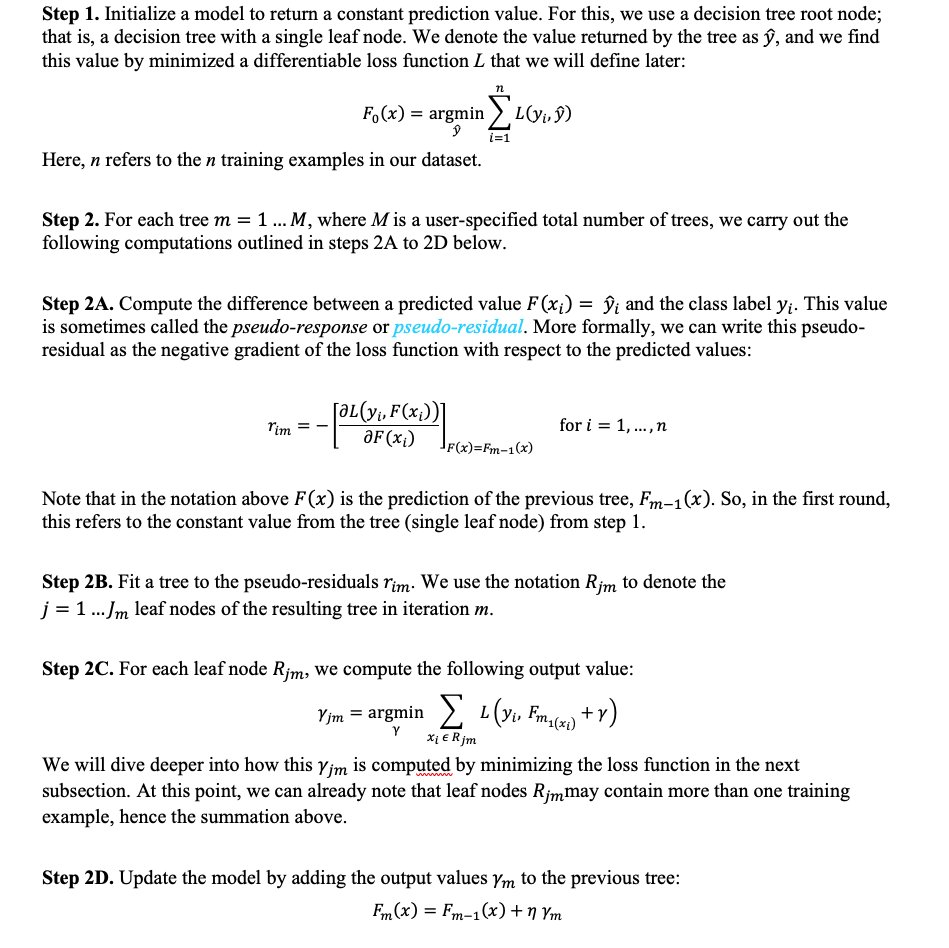

In [15]:
Image('../images/Boosting_a_la_Raschka1.jpeg')

## most important parameters for stochastic gradient-boosting:
 - __learning_rate__: the factor $\alpha$ in the above graphic
 - __subsample__: takes part of the data without replacement; prevents overfitting
 - __feature_fraction__: select a subset of the features for the next tree; prevents overfitting
 - __num_leaves__: number of leaves; lightgbm fits level-wise and leaf-wise; prevents overfitting
 - __max_depth__: number of levels to grow the tree; prevents overfitting
 - __num_iterations__: number of trees to grow
 - __max_bin__: in lightgbm all features are discretized by binning them; the number of bins for a feature is given by __max_bin__ (this is what makes lightgbm super-fast)
 - __lambda_l1/lambda_l2__: regularizes the leaf-weights; __excurs__: the result assigned to all cases that end up in one leaf is called the weight; for regression this is a continuous value and also for classification since the result is ultimately passed through a sigmoid-function that assigns then values between 0 and 1; <br>
 
For a speed comparison between lightgbm and xgboost see e.g. [results from 2017](https://medium.com/implodinggradients/benchmarking-lightgbm-how-fast-is-lightgbm-vs-xgboost-15d224568031) Meanwhile xgboost catched up with lightgbm.<br>
A good paper, describing how the features of lightgbm have beed added to xgboost [is this one.](https://drive.google.com/file/d/0B0c0MbnP6Nn-eUNRRkVOOGpkbFk/view)<br>
Less mathematical however, is this report here: 
https://everdark.github.io/k9/notebooks/ml/gradient_boosting/gbt.nb.html#5_lightgbm

Perhaps add Explainable Boosting Machines und GAM<br>

https://interpret.ml/docs/ebm.html<br>

https://www.cs.cornell.edu/~yinlou/papers/lou-kdd12.pdf<br>

This is also interesting because we have a 'generalized additive model' - basically we could understand all single steps ;-)